# Predicting the Churn Rate for Telecoms Company

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Extract the Target Variables 

In [5]:
df1 = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]

In [6]:
df1.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Build the Logistic Regression Model

In [9]:
y=df1['Churn']

In [10]:
X=df1.drop(['Churn'], axis=1)

## Convert String into Binary

In [11]:
def yto1(s):
    if s == 'Yes':
        return 1
    else:
        return 0

In [12]:
y=pd.Series(list(map(yto1,y)))

In [13]:
X.shape

(7043, 3)

In [14]:
y.shape

(7043,)

## Scale the Target Variables 

In [15]:
scaler = MinMaxScaler()
 
X = scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns=['tenure', 'SeniorCitizen', 'MonthlyCharges'])


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   float64
 1   SeniorCitizen   7043 non-null   float64
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(3)
memory usage: 165.2 KB


In [17]:
X.head()


,tenure,SeniorCitizen,MonthlyCharges
0,0.013889,0.0,0.115423
1,0.472222,0.0,0.385075
2,0.027778,0.0,0.354229
3,0.625000,0.0,0.239303
4,0.027778,0.0,0.521891


## Implementing Test Train Split & Testing

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [20]:
logreg=LogisticRegression(max_iter=300)

In [21]:
clf=logreg.fit(X_train,y_train)

In [22]:
y_pred=clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [24]:
accuracy_score(y_test, y_pred)

0.7827733080927591

In [25]:
confusion_matrix(y_test, y_pred)

array([[1409,  144],
       [ 315,  245]])

## Checking the Results with Visualisations

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
import matplotlib.pyplot as plt

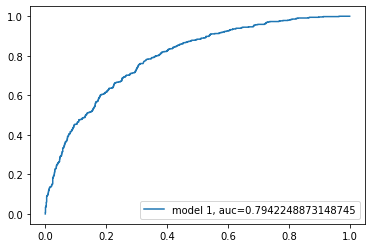

In [28]:
y_pred_probability=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test, y_pred_probability)
auc=roc_auc_score(y_test,y_pred_probability)
plt.plot(fpr,tpr,label='model 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
target_names =['good churn','bad churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  good churn       0.82      0.91      0.86      1553
   bad churn       0.63      0.44      0.52       560

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



/Users/macbookpro/opt/anaconda3/envs/AndyClass/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


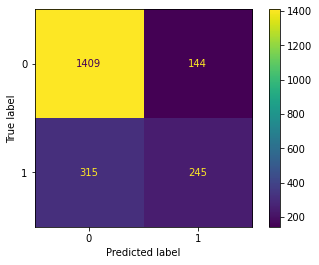

In [30]:
plot_confusion_matrix(clf, X_test, y_test)  

## Even a simple model will give us more than 70% accuracy. Why?

## Sampling with Smote

In [31]:
import imblearn

In [32]:
from sklearn.datasets import make_classification

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smt=SMOTE()

In [35]:
X_tl, y_tl=smt.fit_resample(X,y)

In [36]:
y.shape

(7043,)

In [37]:
y.value_counts()

0    5174
1    1869
dtype: int64

In [38]:
y_tl.value_counts()

0    5174
1    5174
dtype: int64

In [39]:
X_tl.shape

(10348, 3)

In [40]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [41]:
clf_tl=logreg.fit(X_train_tl,y_train_tl)

In [42]:
y_pred_tl=clf_tl.predict(X_test_tl)

In [43]:
accuracy_score(y_test_tl, y_pred_tl)

0.7243156199677939

/Users/macbookpro/opt/anaconda3/envs/AndyClass/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


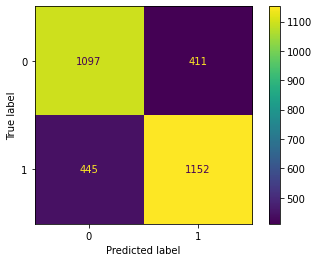

In [44]:
plot_confusion_matrix(clf_tl, X_test_tl, y_test_tl) 

## Sampling with Tomek

In [45]:
from imblearn.under_sampling import TomekLinks

In [46]:
tomek=TomekLinks()

In [47]:
X_tl,y_tl=tomek.fit_resample(X,y)

In [48]:
y_tl.shape

(6562,)

In [49]:
y_tl.value_counts()

0    4693
1    1869
dtype: int64

In [50]:
X_tl.shape

(6562, 3)

In [51]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [52]:
clf_tl=logreg.fit(X_train_tl,y_train_tl)

In [53]:
y_pred_tl=clf_tl.predict(X_test_tl)

In [54]:
accuracy_score(y_test_tl,y_pred_tl)

0.7887252412392077

/Users/macbookpro/opt/anaconda3/envs/AndyClass/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


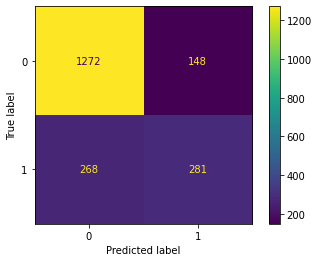

In [55]:
plot_confusion_matrix(clf_tl, X_test_tl, y_test_tl) 